# Trabajo Semana 6 - Dataset Diabetes
### Asignatura: Fundamentos IA
#### Especialización en Inteligencia Artificial
##### Realizado por: Michael Andrés Mora Poveda

<font size='3'>
El objetivo de este trabajo es realizar el análisis a través de todos los conceptos y métodos relacionados con estadística inferencial para el Diabetes dataset, el cual se puede encontrar en la siguiente página web (y dentro de este folder también)y el cual se encuentra referenciado al final de este notebook:  <br>

* https://www.kaggle.com/datasets/mathchi/diabetes-data-set
    
    
Además, es importante tener en cuenta que dentro de este análisis se aplicarán varias librerías de Python para mayor practicidad.

Las siguientes descripciones serán útiles para conocer la estructura del dataset:

### Descripción general:

Según el repositorio oficial, esta información ha sido dispuesta por el National Institute of Diabetes and Digestive and Kidney Diseases cuyo objetivo es predecir si una paciente femenina tiene diabetes o no basado en distintos features:
    
1. Pregnancies: Número de embarazos
2. Glucose: Concentración de glucosa en 2 horas de acuerdo a test de tolerancia
3. BloodPressure: Presión sanguínea en milímetros de mercurio (mm Hg)
4. SkinThickness: Grosor del pliegue cutáneo del tríceps (mm)
5. Insulin: Insulina en 2 horas(mu U/ml)
6. BMI: Índice de masa corporal (Peso en kg/(altura en m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function
8. Age: Edad (years)
9. Outcome: Variable objetivo de clasificación (0 para test negativo ó 1 para test positivo)
    
__Nota__: Es importante resaltar, que se seleccionará solamente una de las variables con el fin de realizar el análisis estadístico mencionado.

   

</font>

## 1. Análisis exploratorio y estadístico del diabetes dataset
<font size='3'>
<br>
Vamos a revisar la estructura general de los datos: 
</br>
</font>

In [175]:
#Se importan las librerías clásicas:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as sp
from statistics import geometric_mean, harmonic_mean
from numpy import absolute, mean
from seaborn import displot
import statsmodels.api as sm
from scipy.stats import iqr
import plotly.graph_objects as go

In [2]:
#Importamos los archivos contenidos en el folder y chequeamos los datasets:
dfDiabetes = pd.read_csv('diabetes.csv', sep=',')
dfDiabetes.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
419,3,129,64,29,115,26.4,0.219,28,1
234,3,74,68,28,45,29.7,0.293,23,0
529,0,111,65,0,0,24.6,0.660,31,0
476,2,105,80,45,191,33.7,0.711,29,1
619,0,119,0,0,0,32.4,0.141,24,1


In [19]:
# Revisamos las dimensiones del dataset:
print('Total filas y columnas: {}'.format(dfDiabetes.shape))

Total filas y columnas: (768, 9)


In [20]:
# Ciclo para ver el número de registros por feature
for i in (dfDiabetes.columns):
    print('Columna (feature) {} y número de registros: {}'.format(i, dfDiabetes[i].value_counts().sum()))

Columna (feature) Pregnancies y número de registros: 768
Columna (feature) Glucose y número de registros: 768
Columna (feature) BloodPressure y número de registros: 768
Columna (feature) SkinThickness y número de registros: 768
Columna (feature) Insulin y número de registros: 768
Columna (feature) BMI y número de registros: 768
Columna (feature) DiabetesPedigreeFunction y número de registros: 768
Columna (feature) Age y número de registros: 768
Columna (feature) Outcome y número de registros: 768


In [21]:
# Número de valores NA
for i in (dfDiabetes.columns):
    print('Columna (feature) {} y número de registros NA: {}'.format(i, dfDiabetes[i].isna().sum()))

Columna (feature) Pregnancies y número de registros NA: 0
Columna (feature) Glucose y número de registros NA: 0
Columna (feature) BloodPressure y número de registros NA: 0
Columna (feature) SkinThickness y número de registros NA: 0
Columna (feature) Insulin y número de registros NA: 0
Columna (feature) BMI y número de registros NA: 0
Columna (feature) DiabetesPedigreeFunction y número de registros NA: 0
Columna (feature) Age y número de registros NA: 0
Columna (feature) Outcome y número de registros NA: 0


In [22]:
# Conteo de valores nulos por feature:
dfDiabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [23]:
# Estructura general de las columnas y sus tipos de datos:
dfDiabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<font size='3'>
<br>
En términos generales, vemos que la data no tiene inconsistencias frente a valores nulos y sus descripciones son claras para el entendimiento del ejercicio.
    
Ahora, revisaremos algunas gráficas y concentraciones:    
</br>
</font>

Text(0.5, 1.0, 'Outcome')

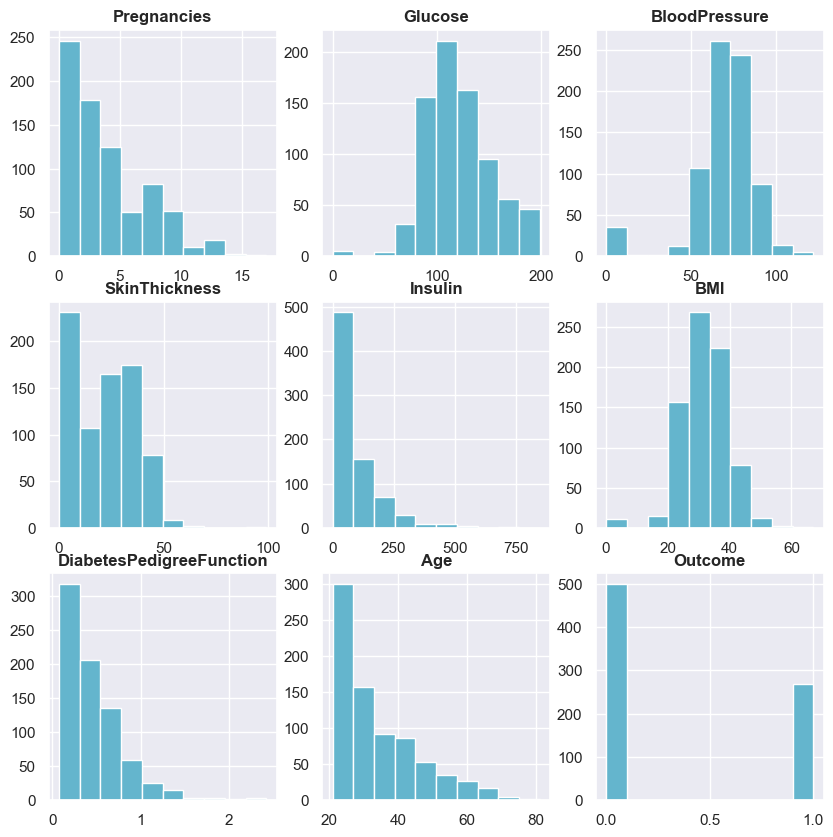

In [71]:
# Vamos a revisar la distribución en general por columnas para ver las concentraciones a nivel general:
fig, axs = plt.subplots(3, 3)
fig.set_size_inches(10,10)
#----------------
axs[0, 0].hist(dfDiabetes['Pregnancies'], bins=10, color = 'c', density=False)
axs[0, 0].set_title('Pregnancies', fontweight ="bold")
#----------------
axs[0, 1].hist(dfDiabetes['Glucose'], bins=10, color = 'c', density=False)
axs[0, 1].set_title('Glucose', fontweight ="bold")
#----------------
axs[0, 2].hist(dfDiabetes['BloodPressure'], bins=10, color = 'c', density=False)
axs[0, 2].set_title('BloodPressure', fontweight ="bold")
#----------------
axs[1, 0].hist(dfDiabetes['SkinThickness'], bins=10, color = 'c', density=False)
axs[1, 0].set_title('SkinThickness', fontweight ="bold")
#----------------
axs[1, 1].hist(dfDiabetes['Insulin'], bins=10, color = 'c', density=False)
axs[1, 1].set_title('Insulin', fontweight ="bold")
#----------------
axs[1, 2].hist(dfDiabetes['BMI'], bins=10, color = 'c', density=False)
axs[1, 2].set_title('BMI', fontweight ="bold")
#----------------
axs[2, 0].hist(dfDiabetes['DiabetesPedigreeFunction'], bins=10, color = 'c', density=False)
axs[2, 0].set_title('DiabetesPedigreeFunction', fontweight ="bold")
#----------------
axs[2, 1].hist(dfDiabetes['Age'], bins=10, color = 'c', density=False)
axs[2, 1].set_title('Age', fontweight ="bold")
#----------------
axs[2, 2].hist(dfDiabetes['Outcome'], bins=10, color = 'c', density=False)
axs[2, 2].set_title('Outcome', fontweight ="bold")

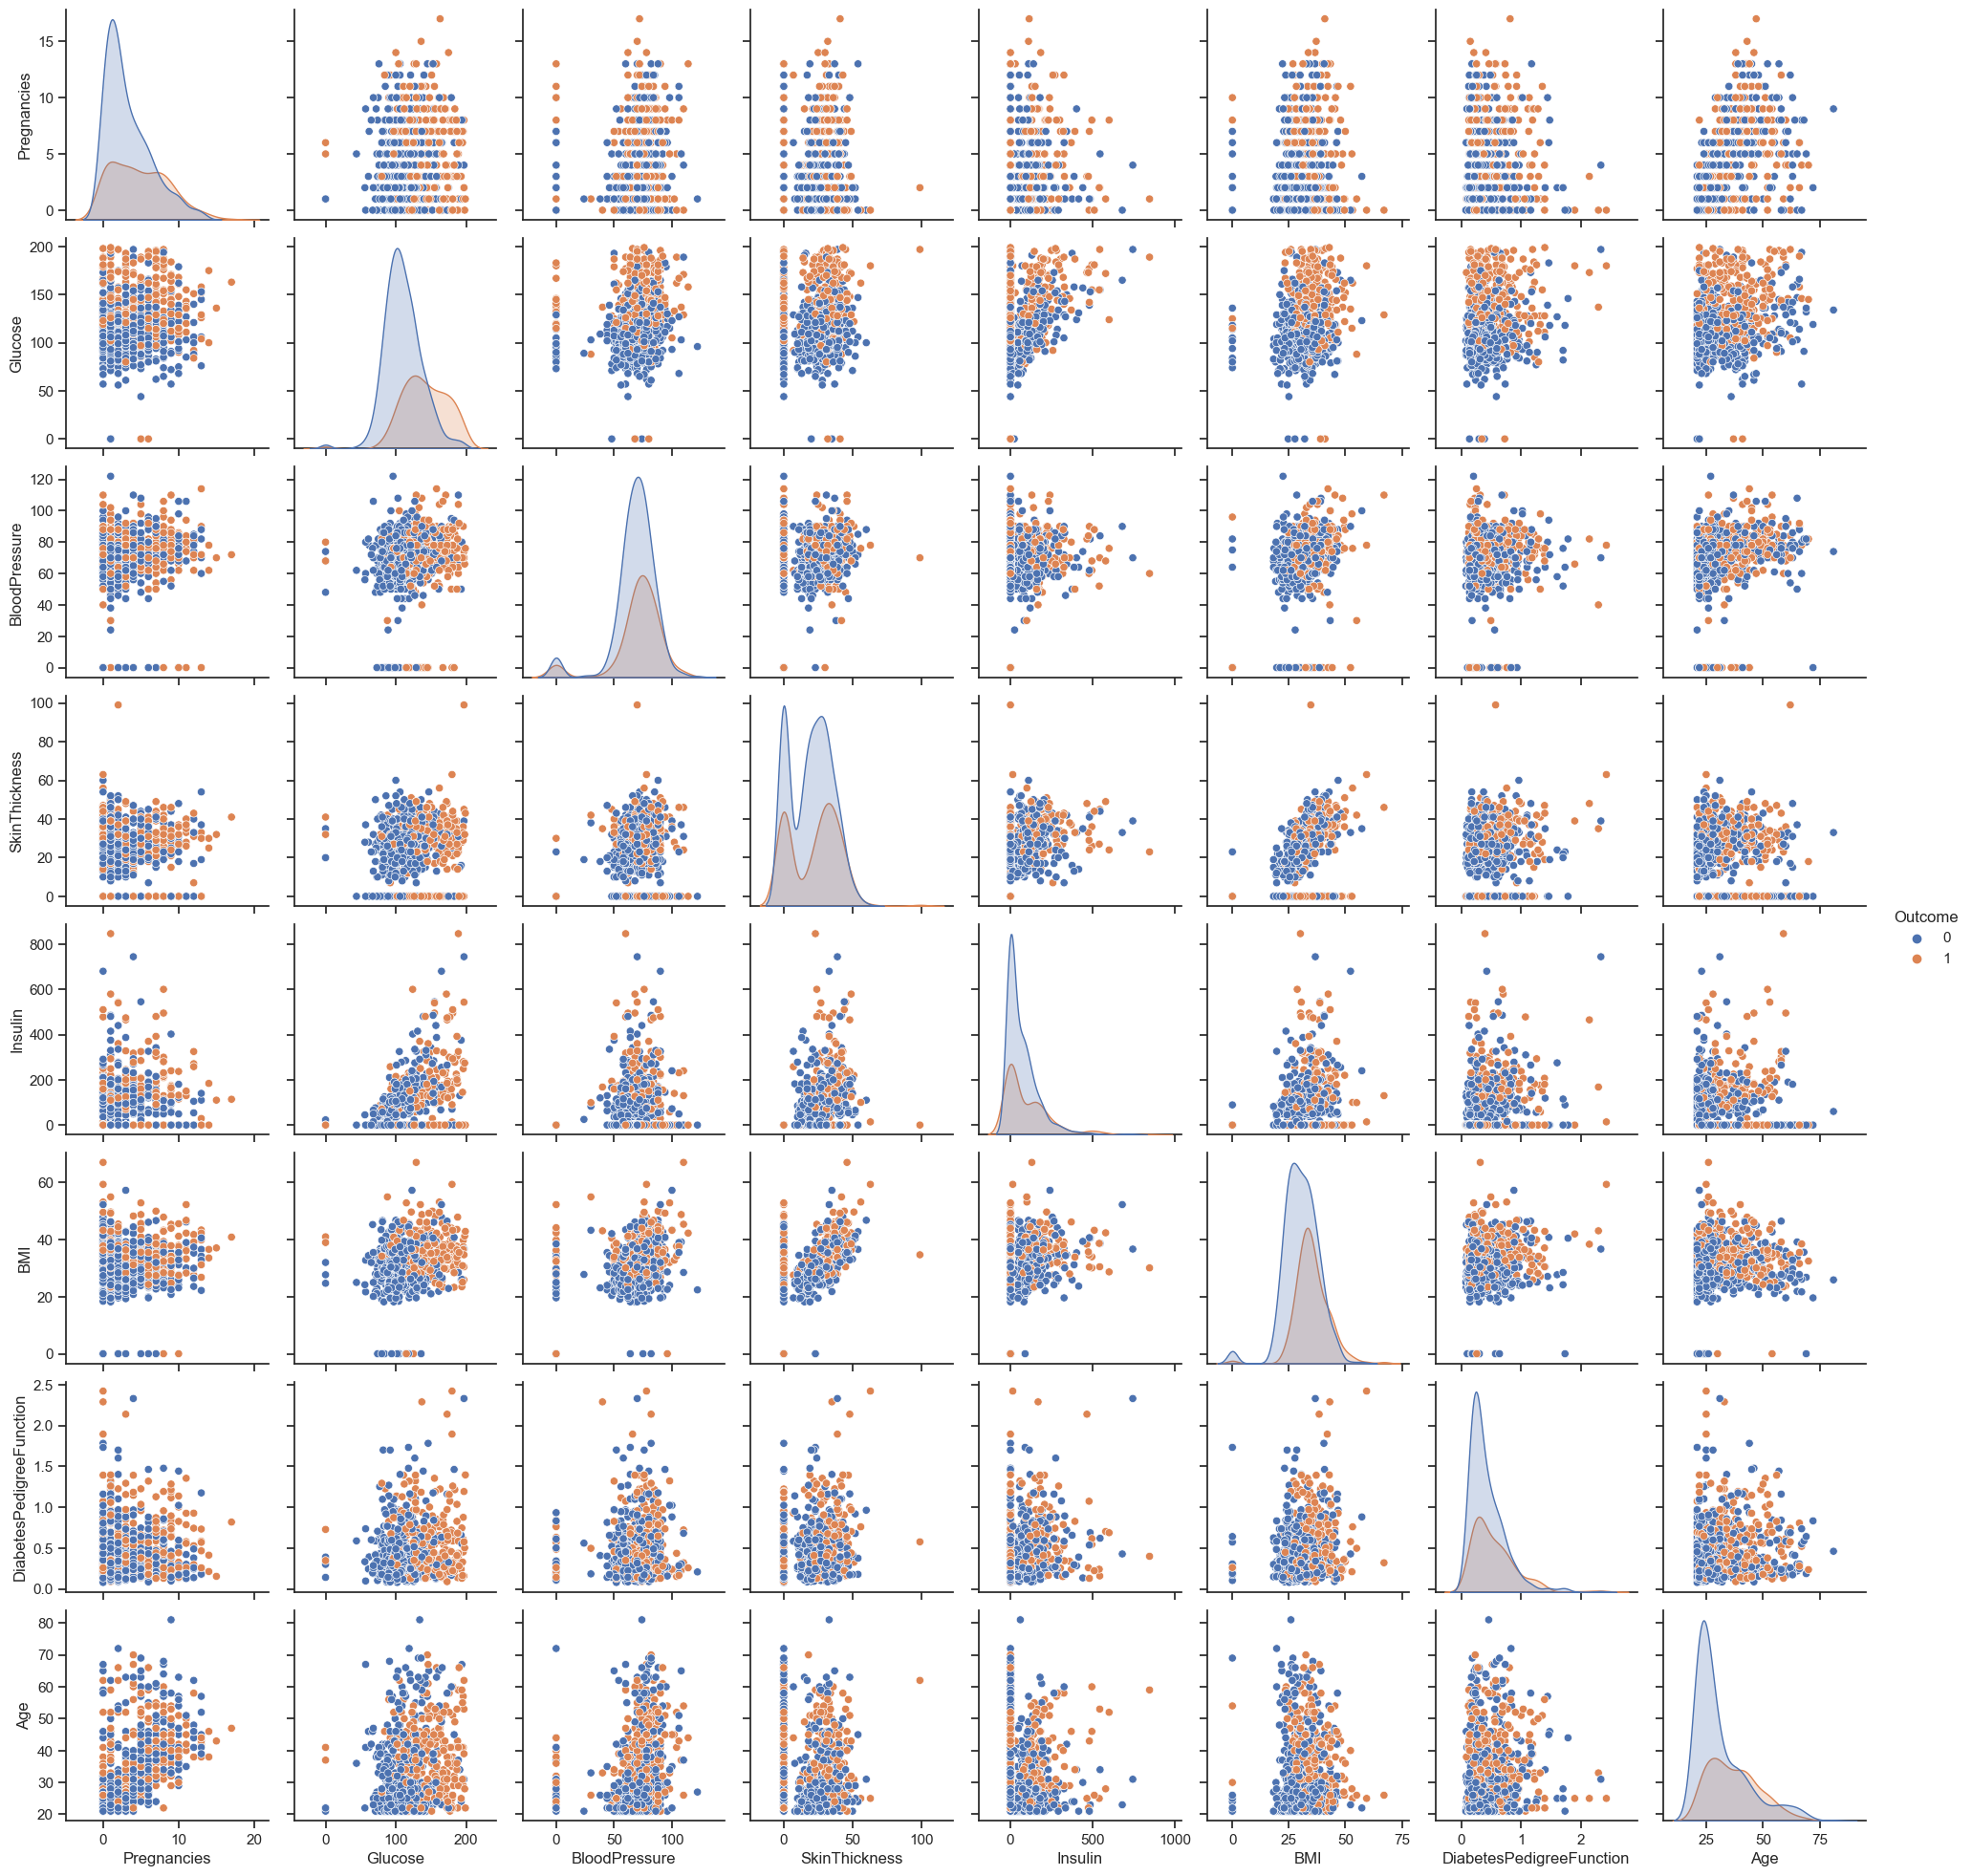

In [73]:
# Reviamos las distribuciones y dispersiones a nivel de todo el dataset:
sns.set_theme(style="ticks")
sns.pairplot(dfDiabetes, hue="Outcome")

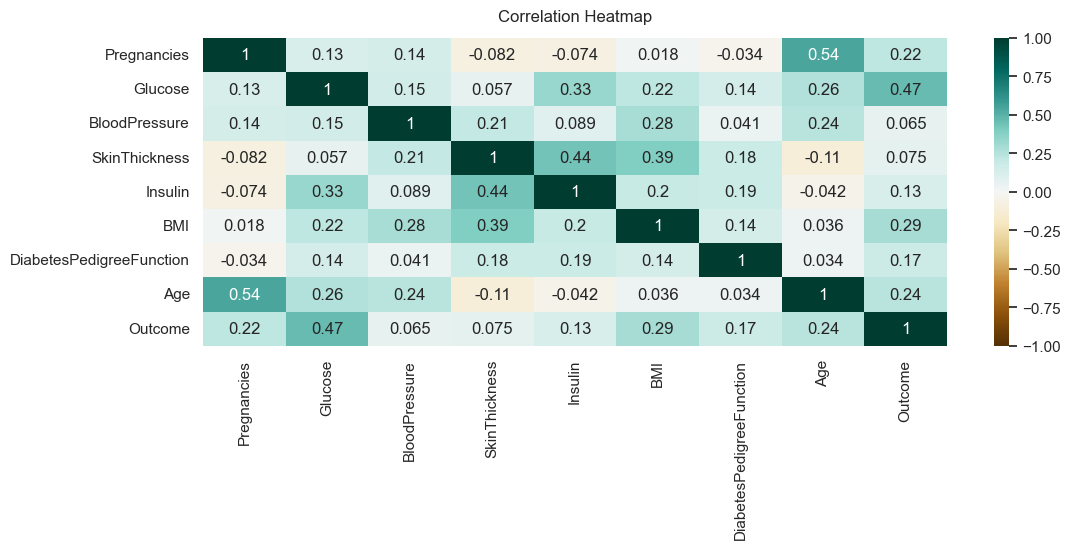

In [72]:
# Creamos el mapa de calor de correlaciones:
plt.figure(figsize=(12, 4))
heatmap = sns.heatmap(dfDiabetes.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

<font size='3'>
<br>
De acuerdo a los resultados anteriores, se tienen las siguientes observaciones:

    * Los histogramas a nivel general no muestran concentraciones de outliers, a excepción de la insulina.
    La variable de pregancies muestra cierta cantidad de mujeres con un alto número de embarazos.
    * La distribución del target variable está balanceada de los pacientes positivos vs. negativos. 
    * De acuerdo al mapa de calor de correlaciones, hay una fuerte relación entre las siguientes 
    variables independientes:
        * Age - Pregancies
        * BMI - SkinThickness
        * BMI - Insuline

</br>

Ahora, para el análisis estadístico e inferencial se seleccionará la variable <b>Glucosa</b>, recordemos que es el azúcar producido en nuestra sangre gracias a todo el proceso del organismo. Es ampliamente utilizado para test de diabetes.
</font>

## 2. Otros cálculos y análisis estadísticos:

Ahora, vamos a revisar algunas medidas y visualizaciones cómo:

* Medias aritmética, geométrica y armónica
* Boxplot, cuartiles y rango intercuartílico
* Asimetría, curtosis, desviación estándar, coeficiente de asimetría

In [57]:
# Seleccionamos la variable independiente para el análisis inferencial:
df_Glucose = dfDiabetes[['Glucose']]
df_Glucose.tail()

,Glucose
763,101
764,122
765,121
766,126
767,93


In [58]:
# Ahora calculamos varias medidas estadísticas por medio de Scipy: 
print(sp.describe(df_Glucose))

DescribeResult(nobs=768, minmax=(array([0]), array([199])), mean=array([120.89453125]), variance=array([1022.24831425]), skewness=array([0.17341396]), kurtosis=array([0.62881333]))


In [59]:
# Utilizamos describe para ver algunas medidas de tendencia central:
df_Glucose.describe()

,Glucose
count,768.000000
mean,120.894531
std,31.972618
min,0.000000
25%,99.000000
50%,117.000000
75%,140.250000
max,199.000000


In [77]:
df_Glucose['Glucose'].replace(0, 0.1)

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64

In [81]:
# Calculamos las medias de nuestra variable seleccionada:
g_mean = geometric_mean(df_Glucose['Glucose'])
h_mean = harmonic_mean(df_Glucose['Glucose'])
mean = np.mean(df_Glucose['Glucose'])
print("La media geométrica es:", g_mean)
print("La media armónica es:", h_mean)
print("La media aritmérica es:", mean)

La media geométrica es: 109.3212348312923
La media armónica es: 0.1533952051810881
La media aritmérica es: 120.89453776041665


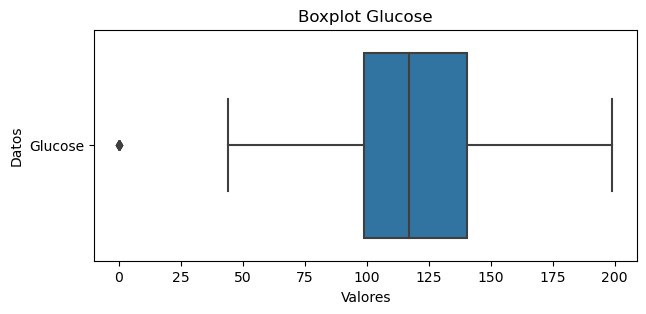

In [87]:
# Ahora veamos el boxplot asociado a la variable para ver posibles outliers:
fig, ax = plt.subplots(figsize=(7, 3))
sns.boxplot(data=df_Glucose, orient='horizontal')

# Configurar las etiquetas de los ejes y el título
ax.set_title('Boxplot Glucose')
ax.set_xlabel('Valores')
ax.set_ylabel('Datos')

# Mostrar el boxplot
plt.show()

In [89]:
# Rango intercuartílico:
iqr_value = iqr(df_Glucose)
print("El valor del IQR es:", iqr_value)

El valor del IQR es: 41.25


In [101]:
# Ahora, revisemos que tanta asimetría tiene nuestra variable a través del coeficiente de asimetría:
df_Glucose.skew()

Glucose    0.173762
dtype: float64

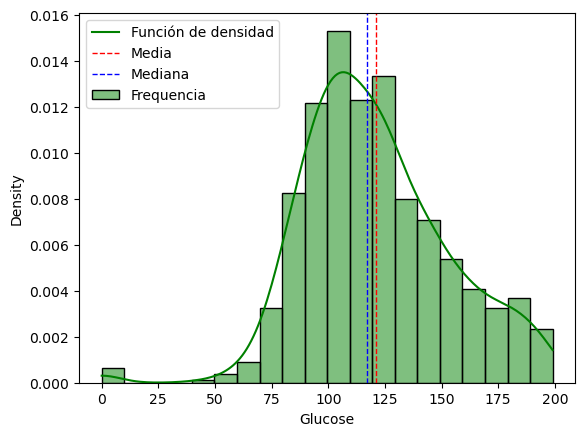

In [106]:
# Graficamente:
sns.histplot(df_Glucose["Glucose"],x = None, color="green", bins=20, kde=True, stat="density", linewidth=1, )
plt.axvline(df_Glucose["Glucose"].mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(df_Glucose["Glucose"].median(), color='b', linestyle='dashed', linewidth=1)
plt.legend(['Función de densidad', 'Media', 'Mediana', 'Frequencia'])
plt.show()

In [108]:
# Ahora calculemos la curtosis:
sp.kurtosis(df_Glucose)

array([0.62878024])

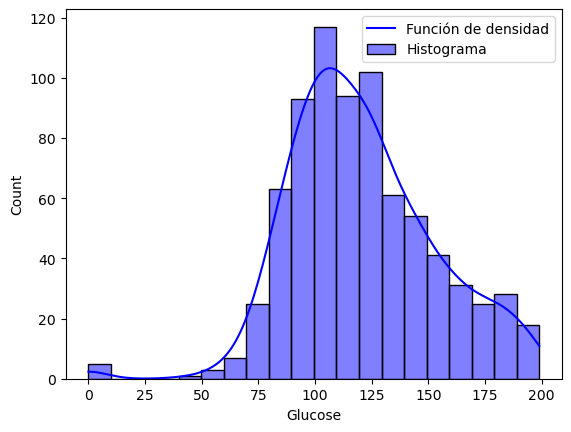

In [123]:
# visualizamos la función de curtósis
sns.histplot(df_Glucose["Glucose"], kde=True, color="blue", bins=20)
plt.legend(['Función de densidad', 'Histograma'])
#sns.kdeplot(df_Glucose["Glucose"])
plt.show()

In [209]:
# Vemos la proporción de pacientes diagnosticados como no diabéticos: 0 y diabéticos: 1
dfDiabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [210]:
# Veamos la desviación estándar y cuasi- desviación típica:
med = df_Glucose["Glucose"].std()
cuasi_med = df_Glucose["Glucose"].std(ddof=0)

print("El valor de la desviación media es:", med)
print("El valor de la cuasi- desviación típica es:", cuasi_med)

El valor de la desviación media es: 31.972593546012895
El valor de la cuasi- desviación típica es: 31.95177127513223


In [211]:
# Ahora veamos la desviación estándar por pacientes NO diabéticos y diabéticos:
dfDiabetes.groupby("Outcome").agg(Glucose=("Glucose", "std"))

,Glucose
Outcome,
0,26.141200
1,31.939622


In [212]:
# Cálculo de la matriz de covarianza
cov_matrix = dfDiabetes.cov()
cov_matrix.style.background_gradient(cmap='Spectral').set_precision(2)


/var/folders/xh/l9ggclrd1fx2brvxlnc_9hv40000gn/T/ipykernel_4175/2413787555.py:3: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,11.35,13.95,9.21,-4.39,-28.56,0.47,-0.04,21.57,0.36
Glucose,13.95,1022.25,94.43,29.24,1220.94,55.73,1.45,99.08,7.12
BloodPressure,9.21,94.43,374.65,64.03,198.38,43.00,0.26,54.52,0.60
SkinThickness,-4.39,29.24,64.03,254.47,802.98,49.37,0.97,-21.38,0.57
Insulin,-28.56,1220.94,198.38,802.98,13281.18,179.78,7.07,-57.14,7.18
BMI,0.47,55.73,43.00,49.37,179.78,62.16,0.37,3.36,1.10
DiabetesPedigreeFunction,-0.04,1.45,0.26,0.97,7.07,0.37,0.11,0.13,0.03
Age,21.57,99.08,54.52,-21.38,-57.14,3.36,0.13,138.30,1.34
Outcome,0.36,7.12,0.60,0.57,7.18,1.10,0.03,1.34,0.23


In [143]:
cov_matrix.loc["Glucose", "Outcome"]

7.115079041720992

### 3. Análisis de varianza ANOVA y Prueba T de Student

Para este ejercicio, realizaremos el ANOVA y Prueba T de Student para la variable de Glucosa, teniendo en cuenta dos grupos: los pacientes diagnosticados como diabéticos y los que NO son diabéticos.

In [165]:
# Filtramos los grupos seleccionados:
Grupo_Diabetico = dfDiabetes.Glucose[dfDiabetes.Outcome == 1]
Grupo_NO_Diabetico = dfDiabetes.Glucose[dfDiabetes.Outcome == 0]

In [171]:
# A través el módulo de Scipy calculamos el ANOVA:
from scipy import stats
anova = stats.f_oneway(Grupo_Diabetico, Grupo_NO_Diabetico)
print(anova)

F_onewayResult(statistic=213.1617521780386, pvalue=8.935431645287658e-43)


In [172]:
# A través el módulo de Scipy calculamos la prueba t de student:
stats.ttest_ind(Grupo_Diabetico, Grupo_NO_Diabetico, nan_policy='omit')

Ttest_indResult(statistic=14.600060005973894, pvalue=8.935431645289913e-43)

De acuerdo a los resultados anteriores, el p-value nos indica que los grupos no tienen diferencias significativas dado que dicho valor es mayor al valor de significancia estándar (0.05). Además, el valor F indica que existe una gran variación entre las medias de los grupos seleccionados, es decir, las muestras vienen de poblaciones distintas.

Por lo tanto, se rechaza la hipótesis nula (que las muestras provienen de poblaciones iguales) y se concluye que no hay diferencias significativas entre las muestras.

In [187]:
fig = go.Figure()
fig.add_trace(go.Box(y=Grupo_Diabetico))
fig.add_trace(go.Box(y=Grupo_NO_Diabetico))
fig.update_layout(
    title={
        'text': "Boxplots Grupo_Diabetico y Grupo_NO_Diabetico",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [197]:
# Test de Shapiro para prueba de normalidad:
sh,p = stats.shapiro(df_Glucose["Glucose"])
print("P-value: ", p)
print('La normalidad se rechaza dado que el valor P es menor que 0.05 y se concluye que la muestra no proviene de una población normalmente distribuida.')
print(p < 0.05)

P-value:  1.9876119847217488e-11
La normalidad se rechaza dado que el valor P es menor que 0.05 y se concluye que la muestra no proviene de una población normalmente distribuida.
True


<font size='3'>


### Conclusiones

* El nivel promedio normal de glucosa en la sangre se encuentra entre 60 y 99 mg/dL (miligramos por decilitro). Este dato es esencial para analizar la distribución de la variable independiente glucosa seleccionada para este análisis estadístico. Ahora, para este dataset se realizó un test de tolerancia de concentración de glucosa en 2 horas, para este caso el nivel oscila entre 120 mg/dL y 140 mg/dL entre 1 y 2 horas.
<br>
* El nivel promedio de glucosa es de 120 mg/dL, lo cual indica niveles normales de glucosa en la muestra. Su desviación estándar oscila estre 90 mg/dL y 150 mg/dL. En general esto tiene sentido dado que la mayoría de pacientes (500 de 768 casos, 65% aprox) fueron diagnosticados como NO diabéticos.
<br>
* La curtosis y su grafica de distribución nos muestra que para la variable seleccionada, esta es leptocúrtica, es decir, la forma de la distribución tiene un pico en el centro y que la curva de la distribución es más estrecha que la distribución normal, esto concuerda con la baja desviación estándar que nos indica la baja dispersión de esta variable.
<br>
* De acuerdo al boxplot, no vemos muchos outliers. Además, vemos una leve tendencia a que varios de los pacientes tienen un nivel más alto de glucosa. Sin embargo, la distribución de nuestra variable tiende a ser casi normal cuando revisamos el coeficiente de asimetría que fue de 0.17.
<br>

* De acuerdo al análisis de varianza ANOVA y prueba T de student, el p-value nos indica que los grupos no tienen diferencias significativas dado que dicho valor es mayor al valor de significancia estándar (0.05). Además, el valor F indica que existe una gran variación entre las medias de los grupos seleccionados, es decir, las muestras vienen de poblaciones distintas. Por lo tanto, se rechaza la hipótesis nula (que las muestras provienen de poblaciones iguales) y se concluye que no hay diferencias significativas entre las muestras.
</br>

* Al hacer la prueba de normalidad, se concluye que la hipótesis nula se rechaza dado que el valor P es menor que 0.05 y se concluye que la muestra no proviene de una población normalmente distribuida.

* Vemos la facilidad de las librerías en Python para optimizar tiempos en construcción y análisis de modelos.

</font>


#### Referencias:

[1]. Diabetes dataset (2022). Kaggle. Taken from: https://www.kaggle.com/datasets/mathchi/diabetes-data-set

[2]. Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

[3]. J. D. Hunter, "Matplotlib: A 2D Graphics Environment", Computing in Science & Engineering, 
     vol. 9, no. 3, pp. 90-95, 2007.

[4]. La función subplots. Interactive chaos. Taken from:https://interactivechaos.com/es/manual/tutorial-de-matplotlib/la-funcion-subplots
